In [5]:
import pandas as pd
url = 'https://github.com/gelos21/datasets/raw/master/data/vehicles.csv.zip'
df = pd.read_csv(url, low_memory=False)
city_mpg = df.city08
highhway_mpg = df.highway08

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41144 entries, 0 to 41143
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        41144 non-null  float64
 1   barrelsA08       41144 non-null  float64
 2   charge120        41144 non-null  float64
 3   charge240        41144 non-null  float64
 4   city08           41144 non-null  int64  
 5   city08U          41144 non-null  float64
 6   cityA08          41144 non-null  int64  
 7   cityA08U         41144 non-null  float64
 8   cityCD           41144 non-null  float64
 9   cityE            41144 non-null  float64
 10  cityUF           41144 non-null  float64
 11  co2              41144 non-null  int64  
 12  co2A             41144 non-null  int64  
 13  co2TailpipeAGpm  41144 non-null  float64
 14  co2TailpipeGpm   41144 non-null  float64
 15  comb08           41144 non-null  int64  
 16  comb08U          41144 non-null  float64
 17  combA08     

In [8]:
city_mpg

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

In [9]:
highhway_mpg

0        25
1        14
2        33
3        12
4        23
         ..
41139    26
41140    28
41141    24
41142    24
41143    21
Name: highway08, Length: 41144, dtype: int64

In [10]:
len(dir(city_mpg))

420

In [ ]:
(city_mpg + highhway_mpg)/ 2

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: float64

In [ ]:
(city_mpg + highhway_mpg)/ 2

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: float64

In [11]:
s1 = pd.Series([10, 20, 30], index=[1, 2, 2])
s2 = pd.Series([35, 44, 53], index=[2, 2, 4], name='s2')

In [ ]:
s1

1    10
2    20
2    30
dtype: int64

In [ ]:
s2

2    35
2    44
4    53
Name: s2, dtype: int64

In [ ]:
s2 + s1

1     NaN
2    55.0
2    65.0
2    64.0
2    74.0
4     NaN
dtype: float64

In [ ]:
s1.add(s2)

1     NaN
2    55.0
2    64.0
2    65.0
2    74.0
4     NaN
dtype: float64

In [ ]:
s1.add(s2, fill_value=0)

1    10.0
2    55.0
2    64.0
2    65.0
2    74.0
4    53.0
dtype: float64

In [ ]:
(city_mpg.add(highhway_mpg.div(2)))

0        31.5
1        16.0
2        39.5
3        16.0
4        28.5
         ... 
41139    32.0
41140    34.0
41141    30.0
41142    30.0
41143    26.5
Length: 41144, dtype: float64

In [ ]:
city_mpg.quantile()

17.0

In [ ]:
city_mpg.quantile(.9)

24.0

In [ ]:
city_mpg.quantile([.1, .5, .9])

0.1    13.0
0.5    17.0
0.9    24.0
Name: city08, dtype: float64

In [ ]:
city_mpg.gt(20).sum() # con estos dos metodos conseguimos filtrar los coche con km sumperior a 20 y luego sumarlos.

10272

In [ ]:
city_mpg.nbytes

329152

In [5]:
make = df.make
make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object

In [6]:
make.value_counts()

Chevrolet                      4003
Ford                           3371
Dodge                          2583
GMC                            2494
Toyota                         2071
                               ... 
Volga Associated Automobile       1
Panos                             1
Mahindra                          1
Excalibur Autos                   1
London Coach Co Inc               1
Name: make, Length: 136, dtype: int64

In [8]:
top5 = make.value_counts().index[:5]
make.where(make.isin(top5), other='Other')

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
41139    Other
41140    Other
41141    Other
41142    Other
41143    Other
Name: make, Length: 41144, dtype: object

In [9]:
# Metodo de if Else con Pandas usando .apply
vc = make.value_counts()
top5 = vc.index[:5]
top10 = vc.index[:10]
def generalize(val):
    if val in top5:
        return val
    elif val in top10:
        return 'Top10'
    else:
        return 'Other'

make.apply(generalize)

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
41139    Other
41140    Other
41141    Other
41142    Other
41143    Other
Name: make, Length: 41144, dtype: object

In [10]:
# Metodo de if Else con Pandas usando .where haciendo llamadas encadenadas
vc = make.value_counts()
top5 = vc.index[:5]
top10 = vc.index[:10]
make.where(make.isin(top5), 'top10').where(make.isin(top10), 'Other')

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
41139    Other
41140    Other
41141    Other
41142    Other
41143    Other
Name: make, Length: 41144, dtype: object

In [11]:
import numpy as np
np.select([make.isin(top5), make.isin(top10)], [make, 'top10'], 'Other')

array(['Other', 'Other', 'Dodge', ..., 'Other', 'Other', 'Other'],
      dtype=object)

In [12]:
import numpy as np
pd.Series(np.select([make.isin(top5), make.isin(top10)], [make, 'top10'], 'Other'), index=make.index)

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
41139    Other
41140    Other
41141    Other
41142    Other
41143    Other
Length: 41144, dtype: object

In [13]:
# Missing Data. Esto encontrara todos los valores con valor nulo y los sumara.
cyl = df.cylinders
cyl.isna().sum()

206

In [14]:
mising = cyl.isna() # aqui guara en una variable todos los indices que no tienen dato
make.loc[mising] # Aqui mostramos el valor de esos indices. Los localizamos con loc al ser de tipo string.

7138     Nissan
7139     Toyota
8143     Toyota
8144       Ford
8146       Ford
          ...  
34563     Tesla
34564     Tesla
34565     Tesla
34566     Tesla
34567     Tesla
Name: make, Length: 206, dtype: object

In [24]:
# Filing In Missing Data
cyl[cyl.isna()] #cyl.isna() devuelve todos con true o false y al pasarlo como indice devuelve los Nan.

7138    NaN
7139    NaN
8143    NaN
8144    NaN
8146    NaN
         ..
34563   NaN
34564   NaN
34565   NaN
34566   NaN
34567   NaN
Name: cylinders, Length: 206, dtype: float64

In [27]:
cyl.fillna(0).loc[7136:7141] #Rellena los nan con cero. Se muestran estos para ir al grano.

7136    6.0
7137    6.0
7138    0.0
7139    0.0
7140    6.0
7141    6.0
Name: cylinders, dtype: float64

In [30]:
pd.cut (city_mpg, 10) # Hace 10 grupos de igual ancho

0        (5.856, 20.4]
1        (5.856, 20.4]
2         (20.4, 34.8]
3        (5.856, 20.4]
4        (5.856, 20.4]
             ...      
41139    (5.856, 20.4]
41140    (5.856, 20.4]
41141    (5.856, 20.4]
41142    (5.856, 20.4]
41143    (5.856, 20.4]
Name: city08, Length: 41144, dtype: category
Categories (10, interval[float64, right]): [(5.856, 20.4] < (20.4, 34.8] < (34.8, 49.2] < (49.2, 63.6] ... (92.4, 106.8] < (106.8, 121.2] < (121.2, 135.6] < (135.6, 150.0]]

In [31]:
pd.cut(city_mpg, [0, 10, 20, 40, 70, 150])# Aqui se especifica el tamaño de cada grupo. Aqui se hacen 5 categorías.

0        (10, 20]
1         (0, 10]
2        (20, 40]
3         (0, 10]
4        (10, 20]
           ...   
41139    (10, 20]
41140    (10, 20]
41141    (10, 20]
41142    (10, 20]
41143    (10, 20]
Name: city08, Length: 41144, dtype: category
Categories (5, interval[int64, right]): [(0, 10] < (10, 20] < (20, 40] < (40, 70] < (70, 150]]

In [58]:
# EJERCICIO 1 PAGINA 80
"""
Create a series from a numeric column that has the value or 'high' if it is equal to or above the mean and 'low' 
if it is below the mean using .apply
"""
import time
inicio = time.time()
#serie = pd.Series([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]) 

def mayor_media(val):
    if val >= city_mpg.mean():
        return 'high'
    else:
        return 'low'
city_mpg.apply(mayor_media)
fin = time.time()

print(fin - inicio)

2.5054595470428467


In [60]:
# EJERCICIO 2 PAGINA 80
"""
Create a series from a numeric column that has the value of 'high' if it is equal to or above the mean and 'low' 
if it is below the mean using np.select"""
import time
inicio = time.time()
#serie = pd.Series([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

pd.Series(np.select([city_mpg >= city_mpg.mean(), city_mpg < city_mpg.mean()],['high','low']))

fin = time.time()
print(fin - inicio)

0.0037741661071777344


In [61]:
# EJERCICIO 3 PAGINA 80
"""
Time the differences between the previous two solucions to see which is faster"""

# como se puede ver, el ejercicio 1 tarda 2.5 segundos y el ejercicio 2 tarda 0.0037 segundos. 675 veces mas rapido.

'\nTime the differences between the previous two solucions to see which is faster'

In [106]:
# EJERCICIO 4 PAGINA 81
"""
Replace the missing values of a numeric series with the median value."""

serie_nulos = pd.Series([-20,3,4,5,np.nan,8,10,np.nan,15,20,30,np.nan,50,200,np.nan])

serie_nulos.replace(np.nan, serie_nulos.median())

0     -20.0
1       3.0
2       4.0
3       5.0
4      10.0
5       8.0
6      10.0
7      10.0
8      15.0
9      20.0
10     30.0
11     10.0
12     50.0
13    200.0
14     10.0
dtype: float64

In [120]:
# EJERCICIO 5 PAGINA 81
"""
Clip the values of a numeric series to between to 10th and 90th percentiles."""
serie_2 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
serie_2.clip(lower=serie_2.quantile(.1), upper=serie_2.quantile(.9))

0    1.9
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
8    9.0
9    9.1
dtype: float64

In [132]:
serie_2.describe()

count    10.00000
mean      5.50000
std       3.02765
min       1.00000
25%       3.25000
50%       5.50000
75%       7.75000
max      10.00000
dtype: float64

In [133]:
# Python code explaining
# numpy.pandas.Categorical()

# importing libraries
import numpy as np
import pandas as pd

# Categorical using dtype
c = pd.Series(["a", "b", "d", "a", "d"], dtype ="category")
print ("\nCategorical without pandas.Categorical() : \n", c)


c1 = pd.Categorical([1, 2, 3, 1, 2, 3])
print ("\n\nc1 : ", c1)

c2 = pd.Categorical(['e', 'm', 'f', 'i',
					'f', 'e', 'h', 'm' ])
print ("\nc2 : ", c2)



Categorical without pandas.Categorical() : 
 0    a
1    b
2    d
3    a
4    d
dtype: category
Categories (3, object): ['a', 'b', 'd']


c1 :  [1, 2, 3, 1, 2, 3]
Categories (3, int64): [1, 2, 3]

c2 :  ['e', 'm', 'f', 'i', 'f', 'e', 'h', 'm']
Categories (5, object): ['e', 'f', 'h', 'i', 'm']


#### EJERCICIO 5 PAGINA 81 
## SIN RESOLVER AUN

##### Using a categorical column, replace any value that is not in the top 5 most frequent values with 'Other'

In [153]:

top5 = make.value_counts().index[:5]
top5

#top5_cat = pd.CategoricalDtype(categories=top5)




Index(['Chevrolet', 'Ford', 'Dodge', 'GMC', 'Toyota'], dtype='object')

### Basic Graph. Matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager

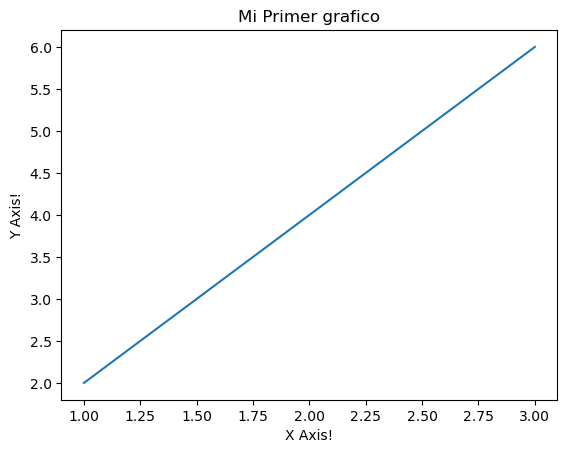

In [3]:
x = [1, 2, 3,]
y = [2, 4, 6]

plt.plot(x,y)

plt.title('Mi Primer grafico', fontdict={'fontname': 'sans', 'fontsize': 12})
plt.xlabel('X Axis!')
plt.ylabel('Y Axis!')
plt.show()